In [1]:
# Import the required libraries and dependencies
import pandas as pd
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [3]:
## Evaluate the Cryptocurrency Wallet by Using the Requests Library
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# Step 1: Create a variable named monthly_income, and set its value to 12000
monthly_income=12000

In [5]:
# Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.
btc_response = requests.get(btc_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19026800,
            "id": 1,
            "last_updated": 1651348743,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 731212910446,
                    "percent_change_1h": 0.348206898157224,
                    "percent_change_24h": 0.26664962878929,
                    "percent_change_7d": -3.15237101057081,
                    "percentage_change_1h": 0.348206898157224,
                    "percentage_change_24h": 0.26664962878929,
                    "percentage_change_7d": -3.15237101057081,
                    "price": 38504.0,
                    "volume_24h": 19244791343
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19026800,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120593160,
            "id": 1027,
            "last_updated": 1651348758,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 337534158778,
                    "percent_change_1h": 0.584959863854703,
                    "percent_change_24h": 0.620660354599373,
                    "percent_change_7d": -5.34928888637663,
                    "percentage_change_1h": 0.584959863854703,
                    "percentage_change_24h": 0.620660354599373,
                    "percentage_change_7d": -5.34928888637663,
                    "price": 2808.37,
                    "volume_24h": 11551114994
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120593160,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [8]:
# Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
# btc_price = (f' The current BTC price is $ {btc_price}')                                
# Print the current price of BTC
print(f'The current BTC price is $ {btc_price}')


The current BTC price is $ 38504.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# eth_price = (f' The current ETH price is $ {eth_price}')
# Print the current price of ETH
print(f'The current ETH price is $ {eth_price}')



The current ETH price is $ 2808.37


In [10]:
# Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.
# Compute the current value of the BTC holding 
# price * total in portfolio
btc_value = btc_price * btc_coins
print(f'The current value of the BTC holding is $ {btc_value}')

The current value of the BTC holding is $ 46204.799999999996


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins
# print the answer as a string
print(f'The current value of the ETH holding is $ {eth_value}')

The current value of the ETH holding is $ 14884.360999999999


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_value_crypto = eth_value + btc_value
print(f' The total value of the cryptocurrency wallet is $ {total_value_crypto}')


 The total value of the cryptocurrency wallet is $ 61089.16099999999


In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200



In [14]:
# Set the variables for the Alpaca API and secret keys
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(Alpaca_API_Key)

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(Alpaca_API_Key, Alpaca_secret_key, api_version="v2")



In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# start_date= pd.Timestamp("2022-04-28",tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2022-04-28", tz="America/New_York").isoformat()
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
yesterday = pd.Timestamp("2022-04-29",tz="America/New_York").isoformat()


In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = yesterday, 
    end = yesterday,
).df
portfolio_df

# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_df[portfolio_df['symbol']== "SPY"].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol']== "AGG"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
portfolio_df = pd.concat([SPY, AGG], axis=1, keys = ['SPY', 'AGG'])                                                     


# Review the first 5 rows of the Alpaca DataFrame
portfolio_df



SPY                                    \
                             open    high     low  close     volume   
timestamp                                                             
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.0  145242451   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.82   

                                                                   
                            close   volume trade_count       vwap  
timestamp                                                          
2022-04-29 04:00:00+00:00  102.87  9922012       33928  103.00342

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df["AGG"]['close'])


# Print the AGG closing price
print(f'The AGG closing price is $ {agg_close_price}')


The AGG closing price is $ 102.87


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'])
# Print the SPY closing price
print(f'The SPY closing price is $ {spy_close_price}')


The SPY closing price is $ 412.0


In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
print(f'The current value of the bond portion of the portfolio is $ {agg_value}')



The current value of the bond portion of the portfolio is $ 20574.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
print(f'The current value of the stock portion of the portfolio is $ {spy_value}')



The current value of the stock portion of the portfolio is $ 45320.0


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value+agg_value

# Print the current balance of the stock and bond portion of the portfolio
print( f'The current balance of the stock and bond portion of the portfolio is $ {total_stocks_bonds}')



The current balance of the stock and bond portion of the portfolio is $ 65894.0


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_value_crypto

# Print total
print(f'The total value of the members entire savings portfolio is $ {total_portfolio}')



The total value of the members entire savings portfolio is $ 126983.161


In [46]:
# Consolidate financial assets data into a Python list
savings_data = [total_stocks_bonds, total_value_crypto]

# Review the Python list savings_data
savings_data



[65894.0, 61089.16099999999]

In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])
# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,65894.000
stock/bond,61089.161


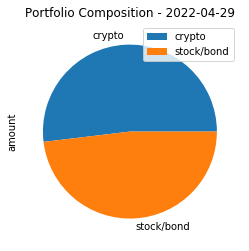

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - 2022-04-29')

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.
distance= emergency_fund_value-total_portfolio

if total_portfolio>emergency_fund_value:
    display("Congratulations member! You have sufficient money in this fund.")
# Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.
elif total_portfolio==emergency_fund_value:
    display("Congratulations on reaching this important financial goal. Your emergency fund is equal to your total portfolio.")
# Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)
else: 
    display(distance)



'Congratulations member! You have sufficient money in this fund.'

# Part 2: Create a Financial Planner for Retirement

In [30]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date=pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date=pd.Timestamp("2022-04-07", tz="america/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
#limit_rows=1000

In [34]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
pricing_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = pricing_df[pricing_df['symbol']== "SPY"].drop('symbol', axis=1)
AGG = pricing_df[pricing_df['symbol']== "AGG"].drop('symbol', axis=1)


# # Concatenate the ticker DataFrames
pricing_df = pd.concat(
    [SPY, AGG], 
    axis=1, 
    keys=["SPY", "AGG"]
)

# # Display both the first and last five rows of the DataFrame
display(pricing_df.head())
display(pricing_df.tail())
display(pricing_df.shape)


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-01 04:00:00+00:00  453.30  453.46  449.14  452.92   88676014   
2022-04-04 04:00:00+00:00  453.20  456.91  452.26  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.83  449.82  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.93  443.47  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.53  448.77   77538519   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-04-01 04:00:00+00:00      624745  451.850848  106.35  106.950  106.250   
2022-04-04 04:00:00+00:00      503316  455.309774  106.87  106.870  106.560   
2022-04-05 04:00:00+00:00      644313  453.412462  106.60  106.625  105.740   
2022-04-06 04:00:00+00:00      901634  446.345270  105.20  105.805  105.115   
2022-04-07 04:00:00+00:00      628673  447.098209  105.38  105.510  105.130   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-01 04:00:00+00:00  106.75  11579091       40126  106.667931  
2022-04-04 04:00:00+00:00  106.84   9956493       32544  106.739298  
2022-04-05 04:00:00+00:00  105.76  11018430       34684  105.931526  
2022-04-06 04:00:00+00:00  105.49  13322630       47090  105.463015  
2022-04-07 04:00:00+00:00  105.26   7921117       25631  105.278761

(1177, 14)

In [35]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    pricing_df, 
    weights = [.6, .4], 
    num_simulation = 500, 
    num_trading_days = 252*30
)

# Review the simulation input data by calling the portfolio_data function
display(MC_thirty_year.portfolio_data.head())
display(MC_thirty_year.portfolio_data.tail())


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57  2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67  2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78  2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87  1913253       10113   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-01 04:00:00+00:00  453.30  453.46  449.14  452.92   88676014   
2022-04-04 04:00:00+00:00  453.20  456.91  452.26  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.83  449.82  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.93  443.47  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.53  448.77   77538519   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-04-01 04:00:00+00:00      624745  451.850848     0.001792  106.35   
2022-04-04 04:00:00+00:00      503316  455.309774     0.008567  106.87   
2022-04-05 04:00:00+00:00      644313  453.412462    -0.012631  106.60   
2022-04-06 04:00:00+00:00      901634  446.345270    -0.009999  105.20   
2022-04-07 04:00:00+00:00      628673  447.098209     0.005039  105.38   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2022-04-01 04:00:00+00:00  106.950  106.250  106.75  11579091       40126   
2022-04-04 04:00:00+00:00  106.870  106.560  106.84   9956493       32544   
2022-04-05 04:00:00+00:00  106.625  105.740  105.76  11018430       34684   
2022-04-06 04:00:00+00:00  105.805  105.115  105.49  13322630       47090   
2022-04-07 04:00:00+00:00  105.510  105.130  105.26   7921117       25631   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-04-01 04:00:00+00:00  106.667931    -0.003268  
2022-04-04 04:00:00+00:00  106.739298     0.000843  
2022-04-05 04:00:00+00:00  105.931526    -0.010109  
2022-04-06 04:00:00+00:00  105.463015    -0.002553  
2022-04-07 04:00:00+00:00  105.278761    -0.002180

In [36]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/oliviaheitz/Desktop/Fintech-workspace/Challenges/Challenge 5/Financial_Planners/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995771,1.003911,0.993087,1.023789,0.993982,0.997824,0.980822,0.998278,1.013228,0.991155,...,0.998940,1.002085,0.999753,0.991766,1.006293,1.008520,0.998170,0.998720,1.006146,0.998687
2,0.990786,1.015782,0.993970,1.033577,0.993747,0.994509,0.981979,1.009948,1.005932,0.988370,...,1.002597,0.987452,0.993483,0.991976,1.012969,0.991590,0.998233,0.995604,1.001745,1.005152
3,0.995932,1.024126,0.993322,1.032322,0.994913,0.999384,0.965881,1.024384,1.012158,0.994449,...,1.011959,0.992850,0.995439,0.995479,1.023957,0.993272,0.995420,1.004422,0.993681,1.006194
4,1.009375,1.027917,0.989754,1.035423,1.006352,1.014494,0.965247,1.025604,1.011515,0.990307,...,1.016280,0.986858,0.991187,1.003439,1.025365,0.992005,0.983965,1.003656,0.994395,1.010341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.087414,22.683414,15.197566,9.186290,14.928941,7.948913,18.230611,4.958096,2.461238,19.780290,...,22.068479,3.035974,18.509812,4.045420,5.803967,9.237922,8.678528,23.931936,20.495594,7.738561
7557,9.109921,22.947249,15.237365,9.194116,14.914349,7.964155,18.213412,4.971613,2.451025,19.969717,...,22.052404,3.038558,18.670864,4.035429,5.800107,9.230965,8.613117,23.767836,20.482995,7.831629
7558,9.189443,23.025099,15.192973,9.088722,14.918014,7.971823,18.017169,5.022521,2.425657,19.869825,...,21.972640,3.036983,18.440351,4.086511,5.817606,9.352621,8.648275,23.819651,20.627524,7.843987
7559,9.266670,23.123794,15.423303,9.040105,14.915293,7.925288,18.061463,5.021698,2.426484,19.848218,...,22.345307,3.018215,18.482309,4.085006,5.849844,9.306664,8.660020,23.983489,20.384256,7.773779


In [40]:
# check for null values
pricing_df.isnull().sum()

SPY  open           0
     high           0
     low            0
     close          0
     volume         0
     trade_count    0
     vwap           0
AGG  open           0
     high           0
     low            0
     close          0
     volume         0
     trade_count    0
     vwap           0
dtype: int64

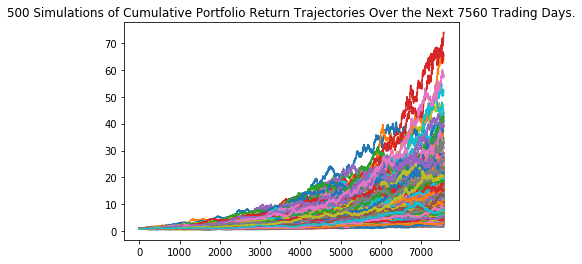

In [39]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirty_year.plot_simulation()

In [41]:
# check shape
pricing_df.shape

(1177, 14)

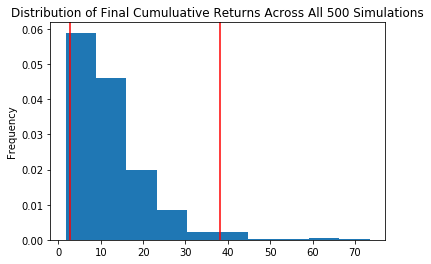

In [42]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_hist_plot = MC_thirty_year.plot_distribution()

In [44]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_yr_sum_stats = MC_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_thirty_yr_sum_stats)

count           500.000000
mean             12.521784
std               9.251751
min               1.676154
25%               6.501642
50%              10.039950
75%              15.762502
max              73.544023
95% CI Lower      2.767704
95% CI Upper     38.217271
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts


In [51]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the members portfolio is $ {total_stocks_bonds}')


The current balance of the stock and bond portion of the members portfolio is $ 65894.0


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_thirty_yr_sum_stats[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_thirty_yr_sum_stats[9]*total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")



There is a 95% chance that the portfolio over the next 30 years will end within in the range of $ 182375.10 and $ 2518288.85.


# Forecast Cumulative Returns in 10 Years

In [59]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_yr = MCSimulation(
    pricing_df,
    weights=[.8, .2],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data by calling the portfolio_data function
display(MC_ten_yr.portfolio_data.head())
display(MC_ten_yr.portfolio_data.tail())



SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57  2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67  2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78  2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87  1913253       10113   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-01 04:00:00+00:00  453.30  453.46  449.14  452.92   88676014   
2022-04-04 04:00:00+00:00  453.20  456.91  452.26  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.83  449.82  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.93  443.47  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.53  448.77   77538519   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-04-01 04:00:00+00:00      624745  451.850848     0.001792  106.35   
2022-04-04 04:00:00+00:00      503316  455.309774     0.008567  106.87   
2022-04-05 04:00:00+00:00      644313  453.412462    -0.012631  106.60   
2022-04-06 04:00:00+00:00      901634  446.345270    -0.009999  105.20   
2022-04-07 04:00:00+00:00      628673  447.098209     0.005039  105.38   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2022-04-01 04:00:00+00:00  106.950  106.250  106.75  11579091       40126   
2022-04-04 04:00:00+00:00  106.870  106.560  106.84   9956493       32544   
2022-04-05 04:00:00+00:00  106.625  105.740  105.76  11018430       34684   
2022-04-06 04:00:00+00:00  105.805  105.115  105.49  13322630       47090   
2022-04-07 04:00:00+00:00  105.510  105.130  105.26   7921117       25631   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-04-01 04:00:00+00:00  106.667931    -0.003268  
2022-04-04 04:00:00+00:00  106.739298     0.000843  
2022-04-05 04:00:00+00:00  105.931526    -0.010109  
2022-04-06 04:00:00+00:00  105.463015    -0.002553  
2022-04-07 04:00:00+00:00  105.278761    -0.002180

In [60]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/oliviaheitz/Desktop/Fintech-workspace/Challenges/Challenge 5/Financial_Planners/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017989,1.019093,0.986167,1.004073,0.984666,1.009631,1.001957,1.002447,1.007503,1.003793,...,0.994732,0.996618,1.008582,1.005374,1.014650,0.993165,0.978106,0.994191,1.016234,1.021192
2,1.022710,1.023775,0.990486,0.994204,0.996606,0.992949,0.997572,1.002639,1.008590,1.009202,...,0.987444,0.993487,1.004208,1.018331,1.000963,1.003345,0.978813,0.983506,1.025149,1.014062
3,1.024432,1.024695,0.997819,0.989581,0.993363,0.998426,0.996715,0.998000,0.998315,0.993704,...,1.007861,0.982245,1.026962,0.989663,1.006285,1.007692,0.983495,0.975458,1.029993,1.010762
4,1.010540,1.019814,0.987925,0.984117,0.986651,0.993763,0.995912,1.009490,1.001000,1.002818,...,1.013485,0.991907,1.024085,0.997693,1.003579,0.999359,0.990338,0.964177,1.030574,1.019329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.521727,4.459044,1.974188,1.343798,2.361903,2.200181,1.122136,2.597898,3.323373,2.101051,...,4.483735,5.672387,1.944184,6.959492,1.840390,3.667899,9.257318,3.033564,2.016037,1.404830
2517,4.542668,4.375421,2.004653,1.372912,2.387255,2.202472,1.120261,2.627082,3.357657,2.087641,...,4.438216,5.664369,1.923048,7.010537,1.840876,3.681279,9.190847,3.030492,2.029881,1.399663
2518,4.600708,4.415465,1.990307,1.354603,2.382008,2.204315,1.110458,2.623913,3.358975,2.083599,...,4.554885,5.737918,1.920080,6.860816,1.823084,3.695477,9.339884,3.005593,2.016803,1.389988
2519,4.590986,4.409555,1.993498,1.367804,2.346556,2.189421,1.091451,2.630779,3.368330,2.056635,...,4.532743,5.626289,1.925340,6.845292,1.844213,3.686127,9.264449,2.983216,2.035879,1.396397


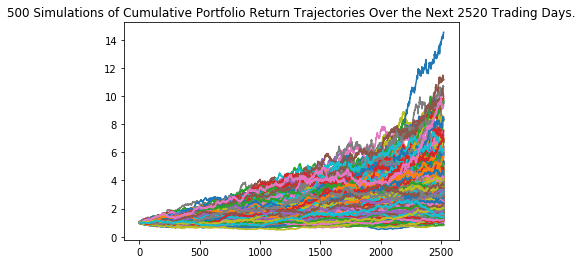

In [61]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_yr_line_plot = MC_ten_yr.plot_simulation()

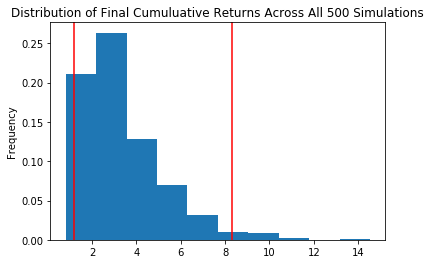

In [62]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_yr_hist_plot= MC_ten_yr.plot_distribution()



In [64]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_yr_sum_stats = MC_ten_yr.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_ten_yr_sum_stats)

count           500.000000
mean              3.342539
std               1.862418
min               0.803811
25%               2.065003
50%               2.847856
75%               4.131115
max              14.539365
95% CI Lower      1.196289
95% CI Upper      8.319876
Name: 2520, dtype: float64


# Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [67]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the members portfolio is $ {total_stocks_bonds}')

The current balance of the stock and bond portion of the members portfolio is $ 65894.0


In [69]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_yr_sum_stats[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = MC_ten_yr_sum_stats[9]*total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")



There is a 95% chance that the portfolio over the next 10 years will end within in the range of $ 78828.29 and $ 548229.90.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

** 